# Bayes' Theorem

######

######

$$Posterior = \frac{Likelihood \times Prior}{Evidence}$$

$$P(A|B) = \frac{P(B|A)\;P(A)}{P(B)}$$

#### What is the probability of drawing a red-suit card from a pack of 52 cards ?

$P(red\;card | I) = \frac{26}{52}$ = $\frac{1}{2}$ $\;$, where I $\equiv$ Total number of card

#### What is the probability of drawing two red-suit card from a pack of 52 cards ?

The probability of occuring one red card is $R_0 = \frac{26}{52} = \frac{1}{2}$ and then another red card is $R_1 = \frac{26-1}{52-1} = \frac{25}{51}$. So, the total probability of occuring both is  = $R_0 \times R_1 = \frac{25}{102}$

Another way to calculate,

$P(R_0 , R_1|I) = P(R_1|R_0,I)\;P(R_0|I) = \frac{25}{51} \times \frac{1}{2} = \frac{25}{102}$

### Parameter estimation

$P(\theta|data,\;M) = \frac{\mathcal{L}(data|\theta,\;M)\;\ \Pi(\theta|M)}{P(data|M)} \;$ where d = observed data, $\theta$ = Parameters and M = Signal hypothesis

#

### The Maths

The likelihood of the data point $y_i,\; t_i,$ given a value for the coefficients we will define to be Gaussian distributed as such :

$P(y_i, t_i|\theta,\;M) = \left|\frac{1}{\sqrt{2\pi \sigma^2}} \exp{(\frac{-(y_i-M)^2}{2 \sigma^2})}\right|$

Assume that all data points are independent. So, the total probability, $P(\{y, t\}|\theta,\;M) = \prod_{i=1}^nP(y_i, t_i|\theta,\;M)$

When solving problems on a computer, it is often convenient to work with the log-likelihood. For the normal distribution, the log-likelihood for n data points is

$$\log(P(\{y_i, t_i\}|\theta,\;M)) = - \frac{1}{2} \left[\sum \left(\frac{-(y_i-M)^2}{\sigma^2}\right)+n\log(2\pi\sigma^2)\right]$$

##

###

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#### Define model :

In [52]:
def model(omega, t):
	return np.sin(omega * t)

time = np.linspace(0, 12, 1000)

sigma = 0.5
omega_true = 1.5

#### Mix some noise !

In [53]:
y_signal = model(omega = omega_true, t = time)
y_obs = y_signal + np.random.normal(0, sigma, len(time))

#### Make a Log-Likelihood function :

In [54]:
def log_likelihood(y_obs, time, omega, sigma = 0.1):
	y_A = model(omega,time)
	L = -0.5 * ((y_obs - y_A)**2/sigma**2 + np.log(2 * np.pi * sigma**2))
	return np.sum(L)

#### Run the Log-Likelihood function for different $\omega$ value

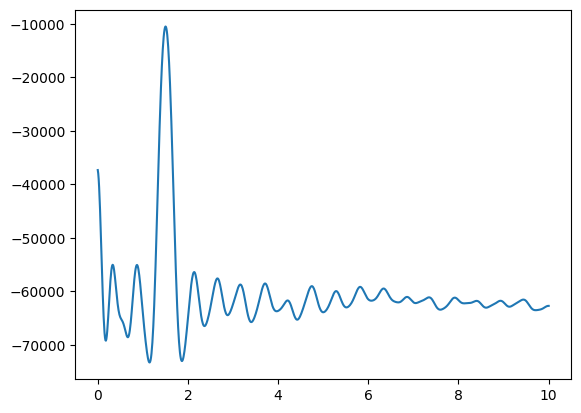

In [55]:
omega_array = np.linspace(0, 10, len(time))
L_array = []

for omega in omega_array :
	L_array.append(log_likelihood(y_obs, time, omega))

plt.plot(omega_array,L_array)

####

The omega value corresponds to maximum log-likelihood is -

In [56]:
Max_LL = omega_array[np.argmax(L_array)]
print(Max_LL)

1.5015015015015014


####

Here, a peak is seen for a $\omega$  value for the maximum log-likelihood. we only consider a small interval around that value.

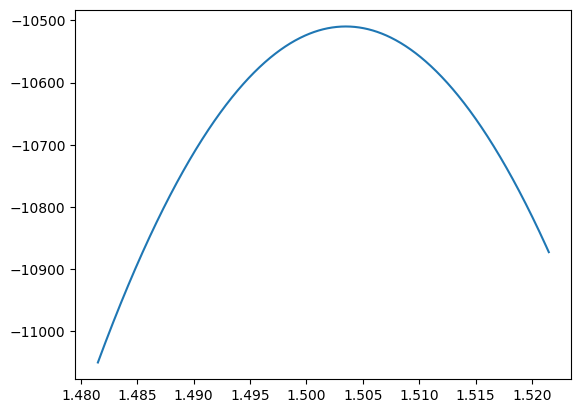

In [57]:
omega_array = np.linspace(Max_LL-2e-2, Max_LL+2e-2, len(time))
L_array = []

for omega in omega_array :
	L_array.append(log_likelihood(y_obs, time, omega))

plt.plot(omega_array,L_array)

#

#####

Now, we convert the log-likelihood into likelihood. But before we substract the mean value form the sample elements of L-array. This is process <i>Centering the Mean</i> or <i>Zero Mean</i>.

There are many important effects of zero mean sample - 
<ol>
    <li>The variance and standard deviation of the data will remain unchanged. This is because variance measures the spread of the data points around the mean, and subtracting the mean shifts all data points equally without affecting their relative distances from each other.</li>
    <li>Mean centering is often a precursor to normalizing the data. This process is important in methods like regression, neural networks to ensure that each feature contributes equally to the analysis.</li>
</ol>

In [58]:
Likelihood = np.exp(L_array - np.mean(L_array))
Likelihood_norm = Likelihood / np.sum(Likelihood)

####

#### Define the Prior

Here I take an uniform distribution for prior.

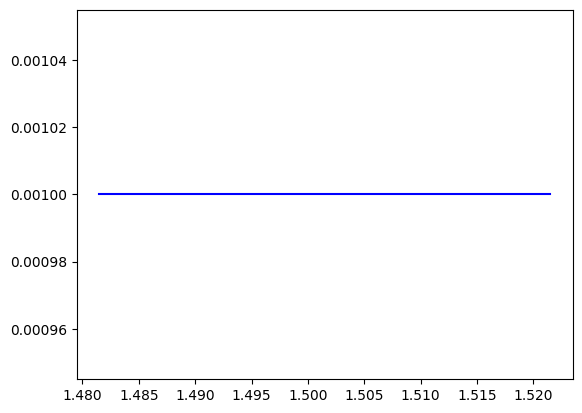

In [59]:
prior = stats.uniform.pdf(omega_array)+1
prior_norm_PDF = prior/np.sum(prior)

plt.plot(omega_array, prior_norm_PDF, color='blue', label='Prior')

##

Posterior is defined by multiplying the likelihood and the prior.

In [60]:
posterior = prior_norm_PDF * Likelihood_norm
posterior = posterior/np.sum(posterior)

######

Let's plot all of three in one figure.

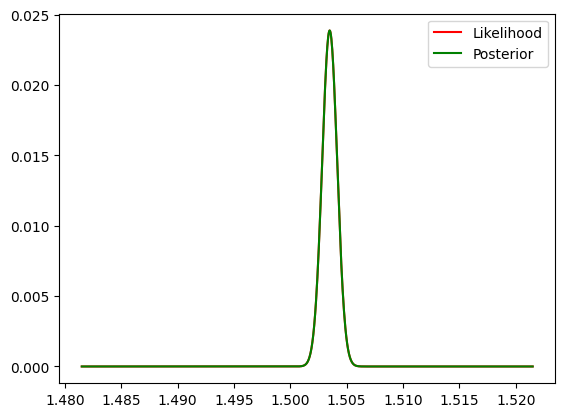

In [61]:
plt.plot(omega_array,Likelihood_norm, color='red', label='Likelihood')
plt.plot(omega_array, posterior, color='green', label='Posterior')

plt.legend()

####

<b>Disclaimer</b>: If the prior distribution is uniform then the posterior distribution will same as the likelihood.